# **MILESTONE 2 PHASE 1**

# **INTRODUCTION**

Name : Teza Marlevi Fajar

Batch : 11

Dataset :

USA_cars_datasets

https://www.kaggle.com/datasets/doaaalsenani/usa-cers-dataset

---
**Assumption** 

I am a junior data scientist at a company called Rockstar Automotive, the company is engaged in buying and selling new and used cars. My job is to create a model to predict the price of potential buyers. In this case I use the Regression algorithm. 



**Dataset**

US Cars'data was scraped from AUCTION EXPORT.com. This dataset included Information about 28 brands of clean and used vehicles for sale in US. Twelve features were assembled for each car in the dataset.

* Price : The sale price of the vehicle in the ads
* Years : The vehicle registration year
* Brand : The brand of car
* Model : model of the vehicle
* Color : Color of the vehicle
* State/City : The location in which the car is being available for purchase
* Mileage : miles traveled by vehicle
* Vin : The vehicle identification number is a collection of 17 characters (digits and capital letters)
* Title Status : This feature included binary classification, which are clean title vehicles and salvage insurance
* Lot : A lot number is an identification number assigned to a particular quantity or lot of material from a single manufacturer.For cars, a lot number is combined with a serial number to form the Vehicle Identification Number.
* Condition : Time

# **IMPORTING LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from feature_engine.outliers import Winsorizer
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


## Fucntion

In this section I will create functions for some case handlers in model generation.

In [2]:
# Make Fucntion for check outliers

def diag_outlier_plots(data):
    for col in data :
        plt.figure(figsize=(16,5))

        #Histogram
        plt.subplot(1,2,1)
        sns.histplot(data[col], bins=30, linewidth=0.5)
        plt.title('Histogram')

        #boxplot
        plt.subplot(1,2,2)
        sns.boxplot(y=data[col], linewidth=0.5)
        plt.title('Boxplot')
        plt.show()

In [3]:
# Make Function for check distribution

def check_dist(data) :
    dist = data.skew(numeric_only=True)
    normal_dist = []
    skew_dist = []

    for i in range(len(dist)):
        if dist.values[i] < -0.5:
            skew_dist.append(dist.index[i])
        elif dist.values[i] > 0.5:
            skew_dist.append(dist.index[i])
        else:
            normal_dist.append(dist.index[i])

    print('skew_dist :', skew_dist)
    print("=========="*15)
    # normal_dist
    print('normal_dist :',normal_dist)

In [4]:
# Make Fucntion for check missing value

def detect_missval(df):
    global df_missval
    df_missval = pd.DataFrame(columns=['Columns Name','Missing Count','Missing Percentage'])
    for i in range(len(df.columns)):
        if df.iloc[:,i].isnull().sum() != 0:
            df_missval.loc[i] = [df.columns[i], 
                                df.iloc[:,i].isnull().sum(), 
                                df.iloc[:,i].isnull().sum()/len(df.iloc[:,i])*100]
    return df_missval

# **DATA LOADING**

In [5]:
# Load Dataset
data = pd.read_csv('USA_cars_datasets.csv')

In [6]:
# Display Dataset
data.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


Display 5 column from Top

In [7]:
data.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


Display 5 columns from Bottom

In [8]:
data.tail()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left
2498,2498,9200,nissan,versa,2018,clean vehicle,31371.0,silver,3n1cn7ap4jl884311,167762228,florida,usa,21 hours left


Dupiclate dataset

In [9]:
data_new = data.copy()

Check Dimensional

In [10]:
data.shape

(2499, 13)

We can check information in dataset.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


Now we will delete the `Unnamed: 0` column because it is the same as the index column

In [12]:
data.drop(columns='Unnamed: 0', inplace=True)

In [13]:
# Display data after delete columns

data

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


# **EXPLORATORY DATA ANALYSIS**

In this section, we will do grouping, query and visualization after that we have to explain the insight.

### The car brand with the highest price?

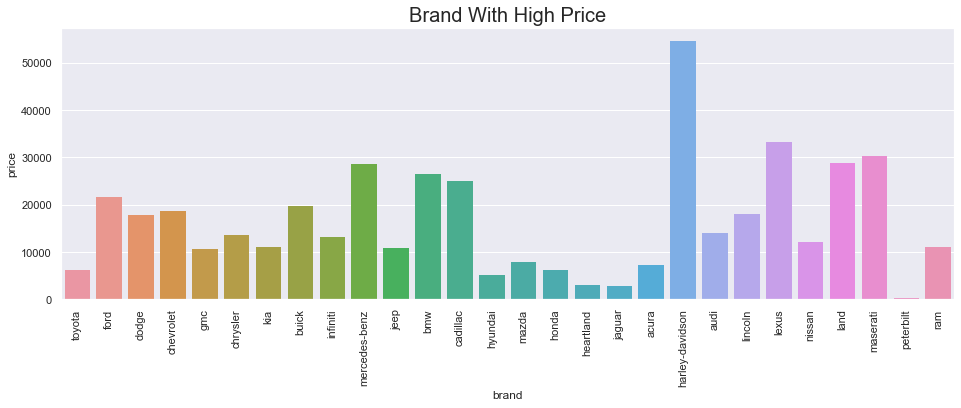

In [14]:
sns.set(rc={'figure.figsize':(16,5)})
plot_brand = data[['brand','price']]
sns.barplot(data=plot_brand, x='brand', y='price', linewidth=0, ci=0)
plt.xticks(rotation=90)
plt.title('Brand With High Price', size=20)
plt.show()

*Explanation*:

as we can see that Harley Davidson has the highest price, which means that the validation of this car company is fairly high.


### Which is more between USA vs Canada

<AxesSubplot:xlabel='country', ylabel='count'>

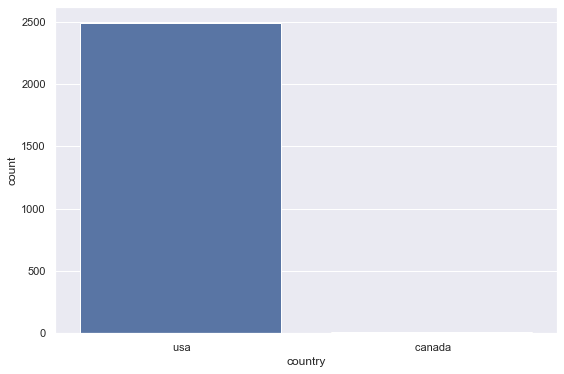

In [15]:
sns.set(rc={'figure.figsize':(9,6)})
sns.countplot(data=data, x='country')

*Explanation*

As we can see that the USA is very large compared to Canada, because in this dataset there is only 1 city originating from Canada, namely Ontario. This is because the company Rockstar Automotive has just expanded its business in Canada, we will see how sales in Canada are.

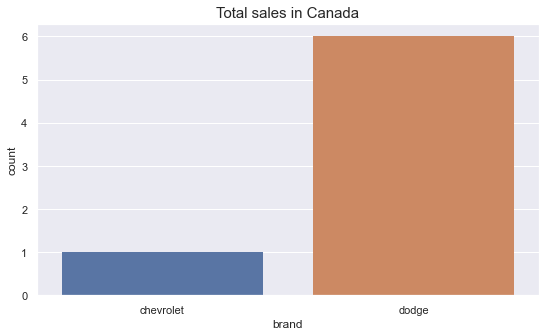

In [16]:
sns.set(rc={'figure.figsize':(9,5)})
sns.countplot(data=data.query("state == 'ontario'")[['brand']], x='brand', linewidth=0)
plt.title('Total sales in Canada', size=15)
plt.show()

*Explenation*

As we can see, that sales in Ontario Canada, there are only 2 car brands, namely Chevrolet with a total of 1 sales and Dodge with a total of 6 sales.

### Car in New York City

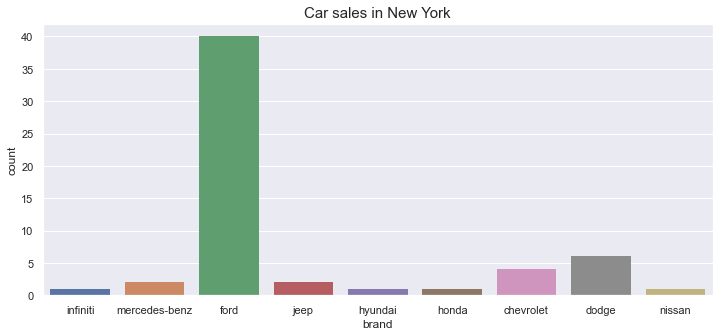

In [17]:
# New York City

nyc = data.query("state == 'new york' ")[['brand']]
sns.set(rc={'figure.figsize':(12,5)})
sns.countplot(data=nyc, x='brand', linewidth=0)
plt.title('Car sales in New York', size=15)
plt.show()

*Explanation*

As we can see that in New York City the highest sales are obtained from the Ford brand, with a total of 40 units, while the Dodge has 6 units and the Chevrolet has units.

### Car comparison by title status

<AxesSubplot:xlabel='title_status', ylabel='count'>

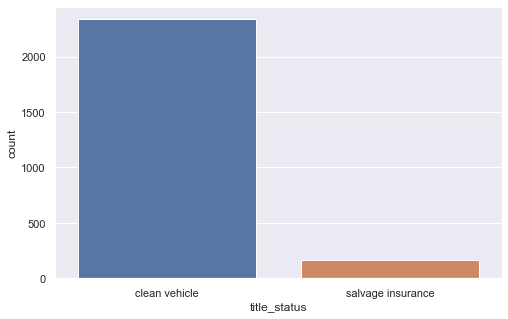

In [18]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(data=data, x='title_status')

*Explenation*

Based on the graph above, we can see that there are more cars with clean vechicle status than cars with salvage insurance status, based on this graph we can see that the cars traded by Rockstar Automotive are average cars that have good quality, then we will see how they compare. prices from Clean Vechile and Salvage Insurance.

<AxesSubplot:xlabel='title_status', ylabel='price'>

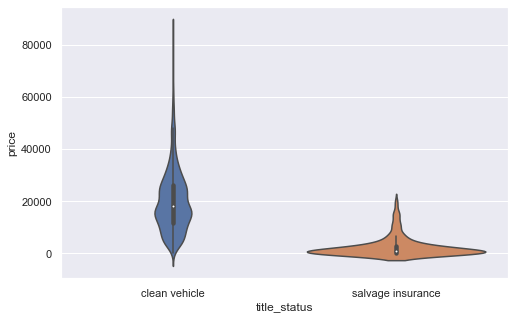

In [19]:
sns.violinplot(data=data, x='title_status', y='price')

*Explanation* 

As we can see that cars with Clean Vechile status have a price of up to 80000 US dollars, while cars with Salvage Insurance status only have a distribution in the area of around 10000 US dollars. Based on the results of this analysis, we can see that cars with salvage insurance status have a selling value. The low one.

### Korelasi

<AxesSubplot:>

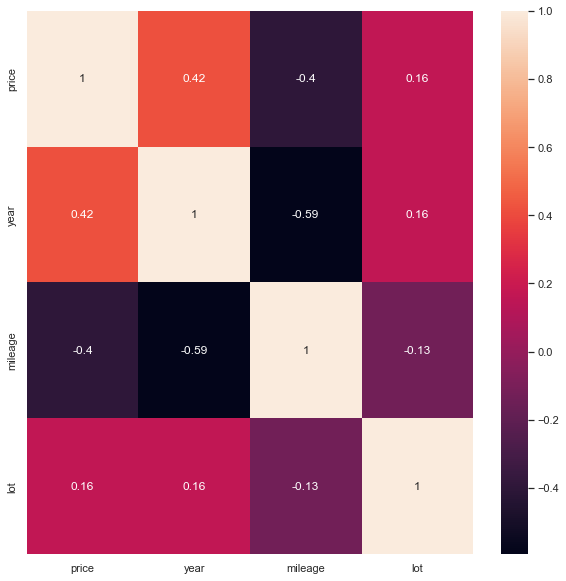

In [20]:
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(data.corr(), annot=True)

*Explanation*

Based on the graph above, we can see that of the three features, year mileage and lot, have a correlation with price, in this case we can consider the data to be used as features in modeling.

# **DATA PREPROCESSING**

This section contains the process of preparing data for the model training process, such as dividing the data into train-dev-test, data transformation (normalization, encoding, etc.), and other necessary processes.

## Get Model Inference

Before doing data inference, I will determine the data to be used as Target and Feature. The target I use is `Price` here we will use price as a target because we want to predict the price. The columns I don't use are vin, lot, state and condition.

I'm not going to use the price column which is 0, why not just imputer it? because in my opinion, if I do imputer later the results I get will be distorted and not pure results.

In [21]:
# Data for model

data_for_model = data[(data.price != 0)].drop(['vin','lot','state','condition','country'], axis=1)

In [22]:
# Get data inference

data_inference = data_for_model.sample(19, random_state=10)
data_inference

,price,brand,model,year,title_status,mileage,color
1878,27999,ford,doors,2016,clean vehicle,10700.0,gray
184,4140,ford,door,2017,clean vehicle,40747.0,white
550,18000,mercedes-benz,door,2015,clean vehicle,82411.0,black
2159,27000,ford,f-150,2018,clean vehicle,40577.0,black
56,20000,jeep,cherokee,2019,clean vehicle,38355.0,charcoal
1797,22800,ford,f-150,2019,clean vehicle,13002.0,white
2174,9300,ford,fiesta,2019,clean vehicle,32305.0,silver
20,12520,gmc,door,2017,clean vehicle,30114.0,white
1517,28700,ford,f-150,2019,clean vehicle,13673.0,white
170,25800,ford,door,2014,clean vehicle,47055.0,brown


Next we will create Train Test data

## Train Test set

We will create a Train Test data set where this data is the data that we will use to conduct training and test the model that we will create, this data also cannot be included from the inference data.

In [23]:
data_train_test = data_for_model.drop(data_inference.index)
data_train_test

,price,brand,model,year,title_status,mileage,color
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black
1,2899,ford,se,2011,clean vehicle,190552.0,silver
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver
3,25000,ford,door,2014,clean vehicle,64146.0,blue
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red
...,...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,clean vehicle,23609.0,red
2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver
2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver
2497,9200,nissan,versa,2018,clean vehicle,32557.0,black


We will do a reset index of the two data

In [24]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inference.reset_index(drop=True, inplace=True)

## Splitting Dataset

Next we will do a split between X and y

In [25]:
# Split between X and y

X = data_train_test.drop(['price'], axis=1)
y = data_train_test['price']

In [26]:
# Display Feature
X.head()

,brand,model,year,title_status,mileage,color
0,toyota,cruiser,2008,clean vehicle,274117.0,black
1,ford,se,2011,clean vehicle,190552.0,silver
2,dodge,mpv,2018,clean vehicle,39590.0,silver
3,ford,door,2014,clean vehicle,64146.0,blue
4,chevrolet,1500,2018,clean vehicle,6654.0,red


In [27]:
# Display Target
y.head()

0     6300
1     2899
2     5350
3    25000
4    27700
Name: price, dtype: int64

Doing a Train Test split

In [28]:
# Split Train Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=109)

# Display dimensional
print('X_train Shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('\nX_test Shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train Shape: (1949, 6)
y_train shape: (1949,)

X_test Shape: (488, 6)
y_test shape: (488,)


We have successfully carried out the Train Test split.

## Handling Outliers

### Outliers

An outlier is a data that deviates or is outside of the standard deviation, we must handle outliers because this can affect the model we are going to make. We will only handle outliers in the Train-set section, before that we will detect outliers.

We will detect outliers using a boxplot, therefore we will create a new variable to drop the column type object

In [29]:
# Drop columns object

data_outliers = X_train.drop(columns=X_train.select_dtypes(object), axis=1)

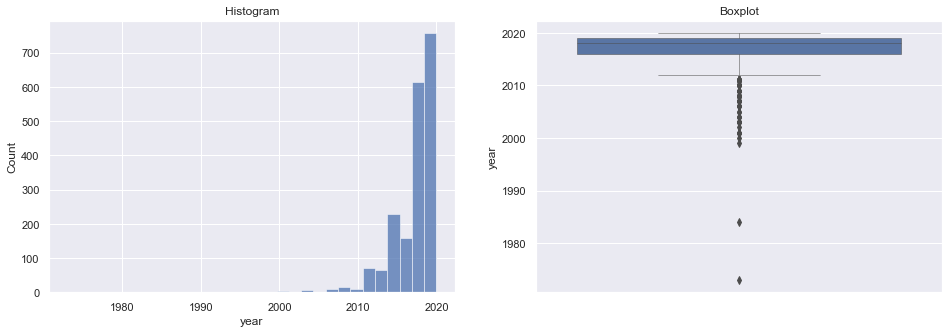

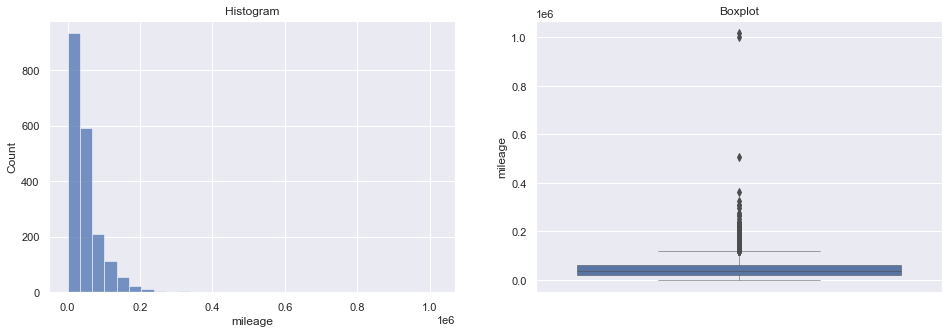

In [30]:
diag_outlier_plots(data_outliers)

As we can see that the result of the graph contains 2 columns that contain outliers, I will not handle these outliers because I think the year of a car can vary from 1980 to 2020 and that is a natural thing. For the mileage or mileage column, I think this is also a natural thing because it could be that one of the car sellers has used the car for a long time or has traveled a very long distance in some time, this is what makes the mileage of a car become high, these reasons made me not to handle outliers in this case.

In [31]:
# Melakukan Censoring atau Capping
winsoriser = Winsorizer(capping_method='iqr', tail='both', fold=1.5, 
                        variables=['mileage'])

winsoriser.fit(X_train)
X_train = winsoriser.transform(X_train)

## Handling Misisng Value

We will check for missing values on the Train Test data set.

In [32]:
# X_train

detect_missval(X_train)

,Columns Name,Missing Count,Missing Percentage


In [33]:
# X_test

detect_missval(X_test)

,Columns Name,Missing Count,Missing Percentage


In [34]:
y_train.isnull().sum()

0

In [35]:
y_test.isnull().sum()

0

After we see that there is no missing value in our dataset, which means we will not handle missing values.

## Feature Selection

Here we will determine or final selection in the selection of the column that will be our feature, in determining the column we will usually use a heatmap to see the correlation of each column and can also use personal judgment if we have a certain statement about that column. We will check from data (X_train) and combine it with target data (y_train). There are several things we should pay attention to in looking at the correlation between features and targets.

1. Correlation has a range of values ​​from -1 to 1 where if the value is close to 0 it means that the features are not correlated with each other, as well as a value that is close to 1 means that the features are correlated with each other.

2. Seeing the correlation using a heatmap can only be used for columns that are numerical, not categorical

3. Target and feature may be correlated, to ensure that the feature matches the target that we will make predictions.

4. Features must not be correlated with other features.

See the correlation between features

<AxesSubplot:>

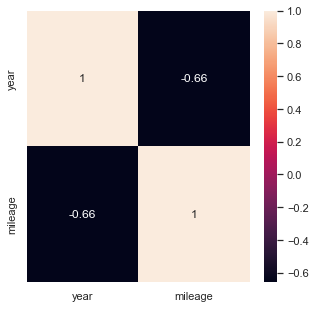

In [36]:
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(X_train.corr(), annot=True)

As we can see that the features have a negative correlation with each other, next I will do a look at the correlation between the feature and the target

<AxesSubplot:>

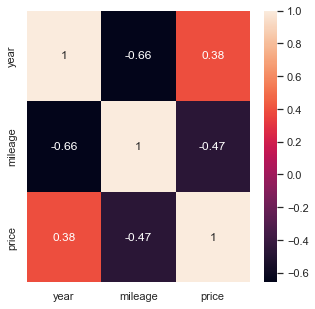

In [37]:
korelasi_train = pd.concat([X_train, y_train], axis=1)
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(korelasi_train.corr(), annot=True)

Based on the results of the heatmap above, we can see that the year column has a good correlation to the price column with a value of 0.41, while the mileage column has a minus correlation to the price column with a value of -0.38, which means that the feature has a good correlation, only that one contains a minus. , but that's okay because in my opinion the mileage column or the mileage of a car can affect the price of a car as described on the website https://www.webuyanycar.com/car-valuation/how-does-car-mileage-affect- value/#:~:text=Car%20mileage%20can%20be%20grouped,20%25%20of%20its%20current%20value , that the mileage can reduce the value of the car, that is the reason I enter the mileage column become a feature of our model.

# **GENERATE PIPELINE**

In this section, we will carry out the process of creating a pipeline starting from separating columns between numerical and categorical to creating a pipline for the model that we have specified.

## Numerical Columns

in this section we will separate between numerically distributed normal and numerically skewed distribution, why do we have to do the separation? because the handling performed for the normal distribution and skewed distribution is different.

In [38]:
# Cek distribusi

check_dist(X_train)

skew_dist : ['year', 'mileage']
normal_dist : []


the results show that the numerical column in our dataset only has a skewed distribution, which is scaling using the MinMax Scaler.

In [39]:
# Numeric Skewed

numeric = ['mileage','year']
numeric_trs = MinMaxScaler()

We have created a pipeline for numerical, then we will make pipeline processing for categorical.

## Categorical Columns

In the categorical column is divided into 2, namely nominal and ordinal:
* Nominal, is a categorical column with levels
* Ordinal, is a categorical column that has no levels

Here I will separate the nominal and ordinal category columns.

In [40]:
# Display X_train

X_train.select_dtypes(include=['object']).head()

,brand,model,title_status,color
1451,ford,f-150,clean vehicle,white
70,bmw,x3,clean vehicle,black
1921,ford,door,salvage insurance,white
1097,dodge,door,clean vehicle,gray
2027,ford,door,clean vehicle,black


It can be seen that the categorical column in my dataset is only filled with nominal categorical, which means in this case I will use OneHotEncoder.

In [41]:
# Categorical 

categorical = ['brand','model','title_status','color']
categorical_trs = OneHotEncoder(handle_unknown='ignore')

We have finished declaring the categorical columns which we will be doing ColumnsTranformer.

## Columns Transformer

In this section we will create a columntransformer as preprocessing data for the model.

In [42]:
# Preprocessor

preprocessor = ColumnTransformer(
    transformers=[
        ("num_columns", numeric_trs, numeric),
        ("cat_columns", categorical_trs, categorical)
    ]
)

We have finished creating the columns transformer

# **MODEL DEFINITION & TRAIN**

My task is to create a model for car price prediction, in this case I use 4 different algorithms namely:

- Lasso
- Super Vector Machine Regressor
- K-Nearest Neighbors Regression
- Ridge Regression

## Model Train

### 1. Lasso Regression

In [43]:
# Lasso Regression

pipe_Lasso = Pipeline(
    steps=[("preprocessor", preprocessor), ("Lasso", Lasso())]
)

lasso = pipe_Lasso.fit(X_train, y_train)

### 2. Super Vector Machine Regression

In [44]:
pipe_SVR = Pipeline(
    steps=[("preprocessor", preprocessor), ("SVR", SVR())]
)

svr = pipe_SVR.fit(X_train, y_train)

### 3. K-Nearest Neighbors Regression

In [45]:
pipe_KNR = Pipeline(
    steps=[("preprocessor", preprocessor), ("KNR", KNeighborsRegressor())]
)

knr = pipe_KNR.fit(X_train, y_train)

### 4. Ridge Regression

In [46]:
pipe_RG = Pipeline(
    steps=[("preprocessor", preprocessor), ("Ridge", Ridge(random_state=10))]
)

ridge = pipe_RG.fit(X_train, y_train)

# **MODEL EVALUATION & IMPROVEMENT**

## Evaluation Model Base line

### 1. Lasso Regression


In [47]:
#Performance Metrics

print('Metrics Mean Absolute Error')
print('Train Results:', mean_absolute_error(y_train, pipe_Lasso.predict(X_train)))
print('Test Results:',mean_absolute_error(y_test, pipe_Lasso.predict(X_test)))

Metrics Mean Absolute Error
Train Results: 4215.988077036151
Test Results: 4941.152304153325


### 2. SVR

In [48]:
#Performance Metrics

print('Metrics Mean Absolute Error')
print('Train Results:', mean_absolute_error(y_train, pipe_SVR.predict(X_train)))
print('Test Results:',mean_absolute_error(y_test, pipe_SVR.predict(X_test)))

Metrics Mean Absolute Error
Train Results: 9159.817278076705
Test Results: 9245.98279817893


### 3. K-Nearest Neighbor Regression

In [49]:
#Performance Metrics

print('Metrics Mean Absolute Error')
print('Train Results:', mean_absolute_error(y_train, pipe_KNR.predict(X_train)))
print('Test Results:',mean_absolute_error(y_test, pipe_KNR.predict(X_test)))

Metrics Mean Absolute Error
Train Results: 4180.598255515649
Test Results: 5480.43237704918


### 4. Ridge Regression

In [50]:
#Performance Metrics Ridge Regression

print('Metrics Mean Absolute Error')
print('Train Results:', mean_absolute_error(y_train, pipe_RG.predict(X_train)))
print('Test Results:',mean_absolute_error(y_test, pipe_RG.predict(X_test)))


Metrics Mean Absolute Error
Train Results: 4304.605553936425
Test Results: 4991.668445437181


We can see that from all the models that we run the results are still not good, on average we have an error of around 4000 to 5000, even the SVR model reaches an error value of 9000. To find out whether this model is good for us to use, next we will do Hyperparameter tuning to improve the model.

## Hyperparameter Tuning & Evaluation

### **Lasso Regression**

In [51]:
# GridSearch for Lasso Regression
params_Lasso = {
    'Lasso__alpha':np.arange(1,3),
    'Lasso__selection': ['cyclic','random']
}
grid_Lasso = GridSearchCV(pipe_Lasso, param_grid = params_Lasso, cv=5).fit(X_train, y_train)

# Make variable for Grid Best estimator
grid_best_lasso = grid_Lasso.best_estimator_

# Pipeline Final
grid_Lasso_final = Pipeline(
    steps=[("grid_best_lasso", grid_best_lasso)]
)

c:\Users\M A R L E V I\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24214938.689994812, tolerance: 22333963.454554074
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\M A R L E V I\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 575314292.9313202, tolerance: 22333963.454554074
  model = cd_fast.sparse_enet_coordinate_descent(
c:\Users\M A R L E V I\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:609: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 588462670.6096954, tolerance: 21963973.799629744
  model = cd_fast.sparse_enet_coordinate_descent(


In [52]:
print('Result Best Params')
print('best params:', grid_Lasso.best_params_)
print('best score:', grid_Lasso.best_score_)

print('===================='*2)
print('Metrics Mean Absolute Error')
print('Train Results:', mean_absolute_error(y_train, grid_Lasso_final.predict(X_train)))
print('Test Results:',mean_absolute_error(y_test, grid_Lasso_final.predict(X_test)))

Result Best Params
best params: {'Lasso__alpha': 2, 'Lasso__selection': 'random'}
best score: 0.6463291542202481
Metrics Mean Absolute Error
Train Results: 4261.259538371199
Test Results: 4964.956957362429


From the results we get, it can be seen that the results we get are not too different from the results of the base line and the Lasso model tends to be underfit where there is a difference of about 6000 distances from the Test set and Train set.

### **Super Vector Machine Regression**

In [53]:
# GridSearch for SVR

params_svr = {
    'SVR__kernel':['linear', 'sigmoid'],
    'SVR__gamma': ['scale','auto'],
    'SVR__C': [20000]
}
grid_svr = GridSearchCV(pipe_SVR, param_grid = params_svr, cv=5).fit(X_train, y_train)

# Make variable for Grid Best estimator
grid_best_svr = grid_svr.best_estimator_

# Pipeline Final
grid_SVR_final = Pipeline(
    steps=[("grid_best_svr", grid_best_svr)]
)

In [54]:
print('Result Best Params')
print('best params:', grid_svr.best_params_)
print('best score:', grid_svr.best_score_)

print('===================='*2)
print('Metrics Mean Absolute Error')
print('Train Results:', mean_absolute_error(y_train, grid_SVR_final.predict(X_train)))
print('Test Results:',mean_absolute_error(y_test, grid_SVR_final.predict(X_test)))

Result Best Params
best params: {'SVR__C': 20000, 'SVR__gamma': 'scale', 'SVR__kernel': 'linear'}
best score: 0.6288405421497293
Metrics Mean Absolute Error
Train Results: 4006.447939545311
Test Results: 4910.641058826191


From the results we can see that the SVR model is decreasing well where the base line error value reaches 9000 and is now around 4000, this means that the hyperparameters that we use are suitable for this model and case, but this model tends to be underfit which means that the difference value reaches 9000 between the Train set and the Test set, in this case the SVR model is not good enough in learning.

### **K-Nearest Neighbor Regression**

In [55]:
# GridSearch for SVR

params_knr = {
    'KNR__n_neighbors':[20],
    'KNR__algorithm': ['auto', 'brute'],
    'KNR__leaf_size': [40]
}
grid_knr = GridSearchCV(pipe_KNR, param_grid = params_knr, cv=5).fit(X_train, y_train)

# Make variable for Grid Best estimator
grid_best_knr = grid_knr.best_estimator_

# Pipeline Final
grid_KNR_final = Pipeline(
    steps=[("grid_best_knr", grid_best_knr)]
)

In [56]:
print('Result Best Params')
print('best params:', grid_knr.best_params_)
print('best score:', grid_knr.best_score_)

print('===================='*2)
print('Metrics Mean Absolute Error')
print('Train Results:', mean_absolute_error(y_train, grid_KNR_final.predict(X_train)))
print('Test Results:',mean_absolute_error(y_test, grid_KNR_final.predict(X_test)))

Result Best Params
best params: {'KNR__algorithm': 'auto', 'KNR__leaf_size': 40, 'KNR__n_neighbors': 20}
best score: 0.5058902713594134
Metrics Mean Absolute Error
Train Results: 5400.043971267316
Test Results: 5850.85


The results of the improvement of the KNR model show that there is an increasing error value from the Train set which was previously around 4000 and now reaches 5000, which means this value is not good. But if we look at the difference between the Train set and the Test set, the range is getting better, where the Train Test range was around 1300 and now it's only 400, it means that this model has increased between Train and Test.

## 4. Ridge Regression

In [57]:
# GridSearch for Ridge Regression

params_rg = {
    'Ridge__alpha':[12],
    'Ridge__solver': ['auto', 'saga','svd','cholesky']
}
grid_rg = GridSearchCV(pipe_RG, param_grid = params_rg, cv=5).fit(X_train, y_train)

# Make variable for Grid Best estimator
grid_best_rg = grid_rg.best_estimator_

# Pipeline Final
grid_RG_final = Pipeline(
    steps=[("grid_best_rg", grid_best_rg)]
)

c:\Users\M A R L E V I\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\M A R L E V I\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\M A R L E V I\anaconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\M A R L E V I\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py", line 1011, in fit
    return super().fit(X, 

In [58]:
print('Result Best Params')
print('best params:', grid_rg.best_params_)
print('best score:', grid_rg.best_score_)

print('===================='*2)
print('Metrics R2 Score')
print('Train Results:',mean_absolute_error(y_train, grid_RG_final.predict(X_train)))
print('Train Results:', mean_absolute_error(y_test, grid_RG_final.predict(X_test)))

Result Best Params
best params: {'Ridge__alpha': 12, 'Ridge__solver': 'auto'}
best score: 0.5927842259181261
Metrics R2 Score
Train Results: 4932.99061710816
Train Results: 5592.669211781286


Based on the results we get that there is an increase in the error value, which means that the hyperparameters we use are not good enough in this model.

# **MODEL SAVING**

We will do a saving model for deployment, where the model selection is based on the best error value.

In [59]:
# Save the best model
with open('grid_KNR_final.pkl', 'wb') as file1:
    pickle.dump(grid_KNR_final, file1)

# **MODEL INFERENCE**

The model that has been trained will be tested on data that is not included in the train-set or test-set. This data must be in the original format, not scaled data.

In [60]:
# Display data inference

data_inference

,price,brand,model,year,title_status,mileage,color
0,27999,ford,doors,2016,clean vehicle,10700.0,gray
1,4140,ford,door,2017,clean vehicle,40747.0,white
2,18000,mercedes-benz,door,2015,clean vehicle,82411.0,black
3,27000,ford,f-150,2018,clean vehicle,40577.0,black
4,20000,jeep,cherokee,2019,clean vehicle,38355.0,charcoal
5,22800,ford,f-150,2019,clean vehicle,13002.0,white
6,9300,ford,fiesta,2019,clean vehicle,32305.0,silver
7,12520,gmc,door,2017,clean vehicle,30114.0,white
8,28700,ford,f-150,2019,clean vehicle,13673.0,white
9,25800,ford,door,2014,clean vehicle,47055.0,brown


Next, the kit will handle the missing values contained in the data inference

In [61]:
data_inference.isnull().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
dtype: int64

From the results we get, it turns out that in the inference data there is no missing value, then we will separate the price column, because that column is the target for which predictions will be made.

In [62]:
# Drop columns

data_inf = data_inference.drop(['price'], axis=1)
data_inf

,brand,model,year,title_status,mileage,color
0,ford,doors,2016,clean vehicle,10700.0,gray
1,ford,door,2017,clean vehicle,40747.0,white
2,mercedes-benz,door,2015,clean vehicle,82411.0,black
3,ford,f-150,2018,clean vehicle,40577.0,black
4,jeep,cherokee,2019,clean vehicle,38355.0,charcoal
5,ford,f-150,2019,clean vehicle,13002.0,white
6,ford,fiesta,2019,clean vehicle,32305.0,silver
7,gmc,door,2017,clean vehicle,30114.0,white
8,ford,f-150,2019,clean vehicle,13673.0,white
9,ford,door,2014,clean vehicle,47055.0,brown


When finished we will make predictions with all the models that we have made before.

In [63]:
# Predict Data Inference

pred_lasso_inf = grid_Lasso_final.predict(data_inf)
pred_svr_inf = grid_SVR_final.predict(data_inf)
pred_knr_inf = grid_KNR_final.predict(data_inf)
pred_rg_inf = grid_RG_final.predict(data_inf)

After predicting, we will create a data frame to see the results more clearly.

In [64]:
lasso_df = pd.DataFrame(pred_lasso_inf, columns=['Lasso(Predict)'])
svr_df = pd.DataFrame(pred_svr_inf, columns=['SVR(Predict)'])
knr_df = pd.DataFrame(pred_knr_inf, columns=['KNR(Predict)'])
rg_df = pd.DataFrame(pred_rg_inf, columns=['Ridge(Predict)'])

Concating data inference and data frame prediction results.

In [65]:
# Melakukan Concat

prediction = pd.concat([data_inference, lasso_df, svr_df, knr_df, rg_df], axis=1)
prediction

,price,brand,model,year,title_status,mileage,color,Lasso(Predict),SVR(Predict),KNR(Predict),Ridge(Predict)
0,27999,ford,doors,2016,clean vehicle,10700.0,gray,19762.854871,20727.570975,22574.10,21001.836037
1,4140,ford,door,2017,clean vehicle,40747.0,white,20462.601490,17481.445468,21891.00,20306.803072
2,18000,mercedes-benz,door,2015,clean vehicle,82411.0,black,20346.215408,20567.519963,14504.75,17598.857790
3,27000,ford,f-150,2018,clean vehicle,40577.0,black,26875.436054,25687.686387,30686.00,26937.463551
4,20000,jeep,cherokee,2019,clean vehicle,38355.0,charcoal,18917.898117,20483.305151,15044.00,18591.344803
5,22800,ford,f-150,2019,clean vehicle,13002.0,white,29329.102523,28231.922525,28235.70,29247.898107
6,9300,ford,fiesta,2019,clean vehicle,32305.0,silver,8226.170944,9246.833692,20630.00,17304.029151
7,12520,gmc,door,2017,clean vehicle,30114.0,white,17962.786752,16019.555886,14290.55,16886.562508
8,28700,ford,f-150,2019,clean vehicle,13673.0,white,29254.649268,28156.057242,28396.40,29172.687307
9,25800,ford,door,2014,clean vehicle,47055.0,brown,18917.521517,14942.788538,23075.60,19790.109450


The results show that our model has successfully predicted the new data.

# **OVERALL ANALYSIS**

In this modeling, I have done 4 modeling algorithms with the best results obtained from the K-Nearest Neighbor model. The model has a high error value compared to other algorithms, but the KNN Regression model has a not-so-high error range between the Train set and the Test set, which means that this model can be considered a good fit in the case of the error range.

Evaluation Errors:

* The model that has the best value is obtained from the K-Nearest Neighbor model
* We gain insight from modeling that the SVR model has a good error reduction after modeling improvement using the pipeline.

## Conclusion

Based on the insights we get from EDA all features and models can be very influential in modeling, and our dataset is also very good data to use in classification cases. Our dataset also provides good insight for making decisions, as we know in the outliers column there are several decisions that must be made and one of them is based on the EDA that we made, namely from EDA, besides that our dataset can also provide good features so that we getting error with mean 4000

Even though it has gotten a pretty good score and got fairly good results, this model has things that need to be improved for the future, namely:

* Addition of data, because I think the data I have is still not enough for modeling
* add features, add features to add learning
* perform hyperparameter settings that are more suitable for the model.